## 폐기물 발생 현황 (폐합성수지류)

코로나로 인해 배달 음식과 간편식 섭취가 증가하였다.   
그에 따른 생활폐기물에서 플라스틱도 늘어나지 않았을까?


### 필요한 라이브러리 불러오기

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

!pip install koreanize-matplotlib

import koreanize_matplotlib

### 데이터 로드하기

https://kosis.kr/statHtml/statHtml.do?orgId=106&tblId=DT_106N_99_3300351&conn_path=I2   
환경부,「전국폐기물발생및처리현황」, 2019, 2023.06.01, 폐기물 발생현황_생활폐기물

https://kosis.kr/statHtml/statHtml.do?orgId=106&tblId=DT_106N_29_2020001&conn_path=I2   
환경부,「전국폐기물발생및처리현황」, 2021, 2023.06.01, 폐기물 발생현황_생활폐기물

2019년 변경사항

▶ 신규 폐기물 항목 추가, 폐기물 명칭 변경(폐기물관리법 상 명칭으로 변경), 항목 순서 변경 등

<종량제 방식에 의한 혼합 배출>

- 작성 범위 및 명칭변경 : 폐플라스틱류 삭제, 폐합성수지류 항목 추가

<재활용가능자원 분리배출>

- 항목 재분류 및 세부분류 추가: 비닐류(합성수지류), 플라스틱류, 발포수지류 ⇒ 폐합성수지류(비닐류, 발포수지류, PET병, 기타)

In [3]:
a = pd.read_csv("폐기물_발생현황_생활폐기물_2016_2018.csv", encoding="cp949")
b = pd.read_csv("폐기물_발생현황_생활폐기물_2019.csv", encoding="cp949")
c = pd.read_csv("폐기물_발생현황_생활폐기물_2020_2021.csv", encoding="cp949")

### 데이터 미리보기

In [103]:
a

,시도(1),항목별(1),항목별(2),항목별(3),2016,2017,2018
0,합계,종량제방식에의한혼합배출,가연성,플라스틱류,3265.3,3546.9,3752.8
1,합계,재활용가능자원 분리배출,플라스틱류,소계,966.7,1082.1,1226.2
2,합계,재활용가능자원 분리배출,합성수지류,소계,1147.0,1203.0,1295.7
3,합계,재활용가능자원 분리배출,발포수지류,소계,109.3,131.0,135.1


In [134]:
b

,시도(1),항목별(1),항목별(2),항목별(3),2019
0,합계,종량제방식에의한혼합배출,가연성,폐합성수지류,4416.5
1,합계,재활용가능자원 분리배출,폐합성수지류,비닐류,1210.9
2,합계,재활용가능자원 분리배출,폐합성수지류,발포수지류,160.7
3,합계,재활용가능자원 분리배출,폐합성수지류,PET병,517.2
4,합계,재활용가능자원 분리배출,폐합성수지류,기타,715.5


In [135]:
c

,구분(1),구분(2),구분(3),구분(4),2020,2021
0,전국,종량제방식 등 혼합배출,가연성,폐합성수지류,1706740.2,1750968.8
1,전국,재활용 가능자원 분리배출,폐합성수지류,비닐류,446161.1,439615.7
2,전국,재활용 가능자원 분리배출,폐합성수지류,발포수지류,74814.9,62222.9
3,전국,재활용 가능자원 분리배출,폐합성수지류,PET병,219142.9,185719.0
4,전국,재활용 가능자원 분리배출,폐합성수지류,기타,418641.9,471651.9


### 데이터 전처리

In [4]:
a = a.pivot_table(index="항목별(1)", values=['2016','2017','2018'], aggfunc='sum')
a

,2016,2017,2018
항목별(1),,,
재활용가능자원 분리배출,2223.0,2416.1,2657.0
종량제방식에의한혼합배출,3265.3,3546.9,3752.8


In [5]:
b = b.pivot_table(index="항목별(1)", values='2019', aggfunc='sum')
b

,2019
항목별(1),
재활용가능자원 분리배출,2604.3
종량제방식에의한혼합배출,4416.5


In [6]:
c = c.pivot_table(index="구분(2)", values=['2020','2021'], aggfunc='sum')
c

,2020,2021
구분(2),,
재활용 가능자원 분리배출,1158760.8,1159209.5
종량제방식 등 혼합배출,1706740.2,1750968.8


In [7]:
df = pd.concat([a, b], axis=1)
df = df * 365
df

,2016,2017,2018,2019
항목별(1),,,,
재활용가능자원 분리배출,811395.0,881876.5,969805.0,950569.5
종량제방식에의한혼합배출,1191834.5,1294618.5,1369772.0,1612022.5


In [8]:
df = df.rename(index={'재활용가능자원 분리배출': '재활용 가능자원 분리배출', '종량제방식에의한혼합배출': '종량제방식 등 혼합배출'})

In [9]:
df = pd.concat([df, c], axis=1)
df

,2016,2017,2018,2019,2020,2021
재활용 가능자원 분리배출,811395.0,881876.5,969805.0,950569.5,1158760.8,1159209.5
종량제방식 등 혼합배출,1191834.5,1294618.5,1369772.0,1612022.5,1706740.2,1750968.8


### 데이터 시각화

In [10]:
transposed_df = df.transpose()

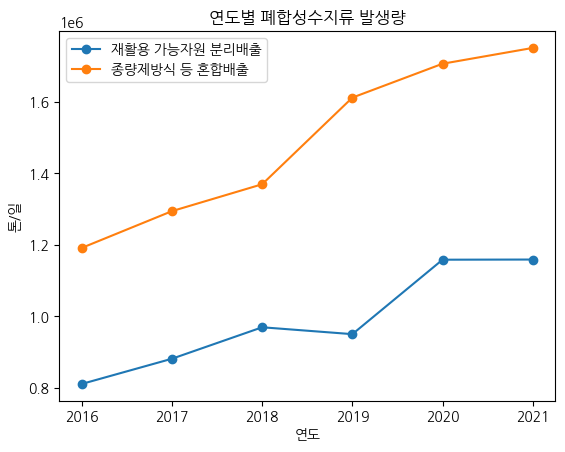

In [23]:
transposed_df.plot(kind='line', marker='o')
plt.xlabel('연도')
plt.ylabel('톤/일')
plt.title('연도별 폐합성수지류 발생량')
plt.xticks(rotation=0)
plt.legend
plt.show()